In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,0.0,1018,24,10,189,10,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,0.0,1025,22,10,99,18,2016,3,0


In [57]:
df.Target.value_counts()

0    89843
1    65380
Name: Target, dtype: int64

## Feature Scaling 

In [3]:
feature_scale=[feature for feature in df.columns if feature not in ['Target']]

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [5]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

In [6]:
data.head()

,Target,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month
0,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.444444,0.87,0.622642,0.619718,0.573770,0.628571,0.164835,0.00,0.559140,0.0,0.602941,0.641791,1.0,0.531429,0.152542,0.333333,0.181818
1,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.444444,0.87,0.622642,0.619718,0.573770,0.628571,0.164835,0.00,0.559140,0.0,0.602941,0.641791,1.0,0.531429,0.152542,0.333333,0.181818
2,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.444444,0.87,0.622642,0.619718,0.573770,0.628571,0.164835,0.00,0.559140,0.0,0.602941,0.641791,1.0,0.531429,0.152542,0.333333,0.181818
3,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.444444,0.87,0.622642,0.619718,0.573770,0.628571,0.164835,0.00,0.559140,0.0,0.602941,0.641791,1.0,0.531429,0.152542,0.333333,0.181818
4,0,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.444444,0.76,0.698113,0.619718,0.590164,0.628571,0.285714,0.34,0.698925,0.0,0.705882,0.611940,1.0,0.274286,0.288136,0.333333,0.181818


In [7]:
X = data.iloc[:,1:]  #independent columns
y = data['Target'] #dependent column

## 1. ExtraTreesClassifier

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

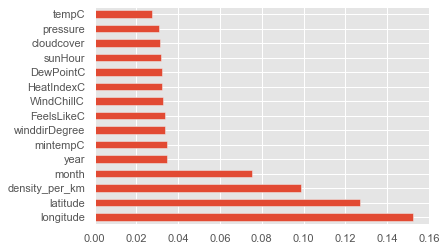

In [9]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## 2. Univariate Selection

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [43]:
print(featureScores)

                Specs       Score
0      density_per_km   97.332319
1            latitude    5.112327
2           longitude    4.210208
3            maxtempC   33.278623
4            mintempC   42.256613
5        totalSnow_cm    2.041244
6             sunHour    1.958065
7             uvIndex   80.242440
8   moon_illumination    0.547551
9           DewPointC   53.727708
10         FeelsLikeC   49.499415
11         HeatIndexC   68.146960
12         WindChillC   35.821717
13       WindGustKmph    1.023603
14         cloudcover   44.404810
15           humidity    0.002153
16           precipMM   12.674314
17           pressure    3.291495
18              tempC   33.278623
19         visibility    0.629041
20      winddirDegree   36.602227
21      windspeedKmph    0.682749
22               year   11.317654
23              month  532.636888


In [44]:
print(featureScores.nlargest(20,'Score'))

             Specs       Score
23           month  532.636888
0   density_per_km   97.332319
7          uvIndex   80.242440
11      HeatIndexC   68.146960
9        DewPointC   53.727708
10      FeelsLikeC   49.499415
14      cloudcover   44.404810
4         mintempC   42.256613
20   winddirDegree   36.602227
12      WindChillC   35.821717
3         maxtempC   33.278623
18           tempC   33.278623
16        precipMM   12.674314
22            year   11.317654
1         latitude    5.112327
2        longitude    4.210208
17        pressure    3.291495
5     totalSnow_cm    2.041244
6          sunHour    1.958065
13    WindGustKmph    1.023603


## 3. Infromation gain

In [14]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)

In [16]:
mutual_data = pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

longitude            0.176484
latitude             0.176193
density_per_km       0.174904
WindChillC           0.018988
sunHour              0.018290
FeelsLikeC           0.017522
HeatIndexC           0.017493
moon_illumination    0.017361
month                0.016606
mintempC             0.015565
DewPointC            0.014972
tempC                0.014766
maxtempC             0.014076
uvIndex              0.012615
winddirDegree        0.008947
year                 0.007899
visibility           0.007791
pressure             0.007363
precipMM             0.006749
cloudcover           0.006406
humidity             0.003720
windspeedKmph        0.002888
totalSnow_cm         0.001855
WindGustKmph         0.001172
dtype: float64

<AxesSubplot:>

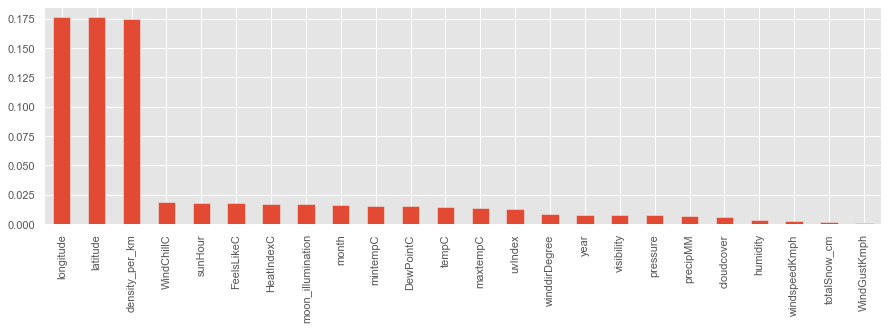

In [22]:
mutual_data.sort_values(ascending=False).plot.bar(figsize=(15,4))

In [40]:
select_col = SelectKBest(mutual_info_classif,k=15)
select_col.fit(X,y)
X.columns[select_col.get_support()]

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'sunHour', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'tempC', 'winddirDegree', 'month'],
      dtype='object')

## 4. XGBoost

[16:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.05159293 0.09280258 0.1152081  0.01598148 0.03800148 0.00678905
 0.01002214 0.01058826 0.02051948 0.07770837 0.10691417 0.18041389
 0.06357768 0.00959945 0.01180435 0.01824766 0.00509056 0.01525628
 0.         0.00478698 0.01432518 0.00956384 0.04571524 0.07549087]


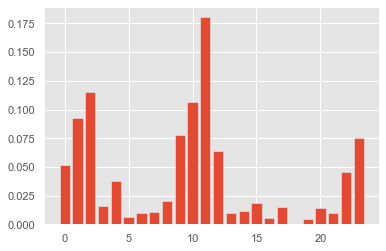

In [49]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [55]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)

HeatIndexC           0.180414
longitude            0.115208
FeelsLikeC           0.106914
latitude             0.092803
DewPointC            0.077708
month                0.075491
WindChillC           0.063578
density_per_km       0.051593
year                 0.045715
mintempC             0.038001
moon_illumination    0.020519
humidity             0.018248
maxtempC             0.015981
pressure             0.015256
winddirDegree        0.014325
cloudcover           0.011804
uvIndex              0.010588
sunHour              0.010022
WindGustKmph         0.009599
windspeedKmph        0.009564
totalSnow_cm         0.006789
precipMM             0.005091
visibility           0.004787
tempC                0.000000
dtype: float32

<AxesSubplot:>

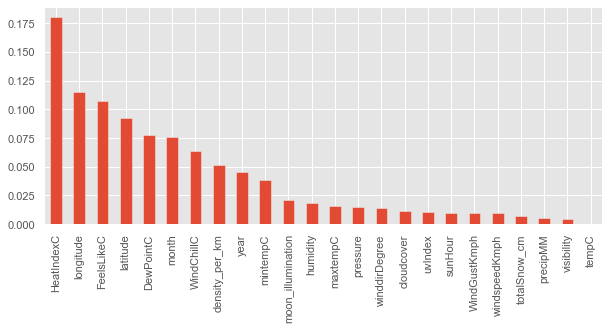

In [52]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)
feat_importance.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [38]:
len(df.columns)

25